### Load Packages

In [ ]:
!pip install graphviz==0.20

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 802.6 kB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score, accuracy_score, mean_squared_error, roc_auc_score
from sklearn.feature_extraction import DictVectorizer
from math import sqrt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz, export_text, plot_tree
import graphviz

### Loading the Dataset

In [ ]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2023-10-23 17:31:47--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv.3’

housing.csv.3       100%[===================>]   1.36M  --.-KB/s    in 0.08s   

2023-10-23 17:31:47 (17.2 MB/s) - ‘housing.csv.3’ saved [1423529/1423529]



In [ ]:
df = pd.read_csv("/content/housing.csv", encoding="utf-8")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
strings = list(df.dtypes[df.dtypes == "object"].index)
strings

['ocean_proximity']

In [ ]:
for col in strings:
  df[col] = df[col].str.lower().str.replace(" ", "_")

In [ ]:
df = df[(df.ocean_proximity == "<1h_ocean") | (df.ocean_proximity == "inland")]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15687 entries, 701 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           15687 non-null  float64
 1   latitude            15687 non-null  float64
 2   housing_median_age  15687 non-null  float64
 3   total_rooms         15687 non-null  float64
 4   total_bedrooms      15530 non-null  float64
 5   population          15687 non-null  float64
 6   households          15687 non-null  float64
 7   median_income       15687 non-null  float64
 8   median_house_value  15687 non-null  float64
 9   ocean_proximity     15687 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


In [ ]:
df = df.fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15687 entries, 701 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           15687 non-null  float64
 1   latitude            15687 non-null  float64
 2   housing_median_age  15687 non-null  float64
 3   total_rooms         15687 non-null  float64
 4   total_bedrooms      15687 non-null  float64
 5   population          15687 non-null  float64
 6   households          15687 non-null  float64
 7   median_income       15687 non-null  float64
 8   median_house_value  15687 non-null  float64
 9   ocean_proximity     15687 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


In [ ]:
def validation_framework(df, seed=42):
  n = len(df)
  n_val = int(n*0.2)
  n_test = int(n*0.2)
  n_train = n - n_val - n_test

  idx = np.arange(n)
  np.random.seed(seed)
  np.random.shuffle(idx)

  df_train = df.iloc[idx[:n_train]]
  df_test = df.iloc[idx[n_train:n_train+n_val]]
  df_val = df.iloc[idx[n_train+n_val:]]
  return df_val, df_test, df_train

In [ ]:
df_val, df_test, df_train = validation_framework(df, 1)
df_val.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5231,-118.24,33.93,32.0,779.0,201.0,861.0,219.0,1.0625,89800.0,<1h_ocean
15429,-117.24,33.21,18.0,1846.0,419.0,1581.0,387.0,3.0982,111300.0,<1h_ocean
19297,-122.80,38.37,26.0,1634.0,315.0,909.0,317.0,4.1731,257200.0,<1h_ocean
5365,-118.39,34.04,45.0,2089.0,312.0,834.0,305.0,7.3028,500001.0,<1h_ocean
7520,-118.26,33.91,33.0,954.0,241.0,655.0,218.0,2.5882,92800.0,<1h_ocean


In [ ]:
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)

In [ ]:
df_val.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-118.24,33.93,32.0,779.0,201.0,861.0,219.0,1.0625,89800.0,<1h_ocean
1,-117.24,33.21,18.0,1846.0,419.0,1581.0,387.0,3.0982,111300.0,<1h_ocean
2,-122.80,38.37,26.0,1634.0,315.0,909.0,317.0,4.1731,257200.0,<1h_ocean
3,-118.39,34.04,45.0,2089.0,312.0,834.0,305.0,7.3028,500001.0,<1h_ocean
4,-118.26,33.91,33.0,954.0,241.0,655.0,218.0,2.5882,92800.0,<1h_ocean


In [ ]:
y_train = np.log1p(df_train.median_house_value)
y_val = np.log1p(df_val.median_house_value)
y_test = np.log1p(df_test.median_house_value)

In [ ]:
del df_train["median_house_value"]
del df_val["median_house_value"]
del df_test["median_house_value"]

In [ ]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.02,37.32,27.0,4336.0,754.0,2009.0,734.0,6.3923,<1h_ocean
1,-121.32,37.97,43.0,2453.0,490.0,1093.0,438.0,2.9107,inland
2,-115.37,32.81,23.0,1458.0,294.0,866.0,275.0,2.3594,inland
3,-118.02,34.08,31.0,2402.0,632.0,2830.0,603.0,2.3333,inland
4,-120.50,37.30,29.0,1572.0,456.0,1697.0,429.0,1.7600,inland


In [ ]:
cols = list(df_train.columns)
cols

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity']

In [ ]:
def one_hot_encoding(train_df, val_df, test_df, sparse=True):
  train_dicts = train_df.to_dict(orient="records")
  val_dicts = val_df.to_dict(orient="records")
  test_dicts = test_df.to_dict(orient="records")

  dv = DictVectorizer(sparse=sparse)
  X_train = dv.fit_transform(train_dicts)
  X_val = dv.transform(val_dicts)
  X_test = dv.transform(test_dicts)
  return X_train, X_val, X_test, dv

In [ ]:
X_train, X_val, X_test, dv = one_hot_encoding(df_train, df_val, df_test, sparse=True)

In [ ]:
print(dv.get_feature_names_out())

['households' 'housing_median_age' 'latitude' 'longitude' 'median_income'
 'ocean_proximity=<1h_ocean' 'ocean_proximity=inland' 'population'
 'total_bedrooms' 'total_rooms']


Question 1

Let's train a decision tree regressor to predict the **median_house_value** variable.

  * Train a model with **max_depth**=1.


In [ ]:
# Create a decision tree regressor
regressor = DecisionTreeRegressor(max_depth=1)  # You can set the depth you prefer
regressor.fit(X_train, y_train)  # Assuming X and y are your data and target values

DecisionTreeRegressor(max_depth=1)

In [ ]:
y_pred = regressor.predict(X_val)
y_pred

array([12.29799327, 12.29799327, 12.29799327, ..., 12.29799327,
       11.61386476, 12.29799327])

In [ ]:
rmse = sqrt(mean_squared_error(y_val, y_pred))
rmse

0.4492209704994719

Which feature is used for splitting the data?

* ocean_proximity
* total_rooms
* latitude
* population


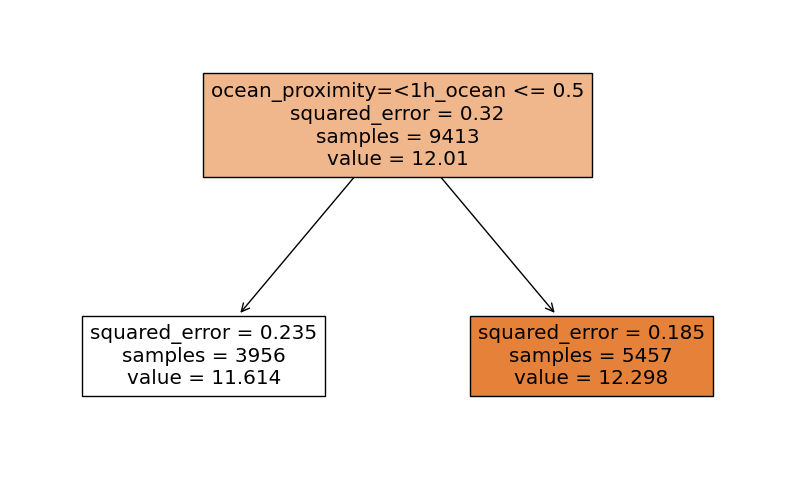

In [ ]:
# Visualize the decision tree
plt.figure(figsize=(10, 6))
plot_tree(regressor, filled=True, feature_names=dv.get_feature_names_out())
plt.show()

### Answer Q.1

---

ocean_proximity

Question 2

Train a random forest model with these parameters:

    n_estimators=10
    random_state=1
    n_jobs=-1 (optional - to make training faster)


In [ ]:
random_forest_regressor = RandomForestRegressor(n_estimators=10, random_state=1)
random_forest_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=1)

In [ ]:
y_pred = random_forest_regressor.predict(X_val)
y_pred

array([11.38912003, 11.91411358, 12.21140408, ..., 13.03480286,
       11.23379969, 12.51951438])

In [ ]:
rmse = round(sqrt(mean_squared_error(y_val, y_pred)),3)
rmse

0.244

What's the RMSE of this model on validation?

    0.045
    0.245
    0.545
    0.845



### Answer Q.2

---
0.245


Question 3

Now let's experiment with the n_estimators parameter

    Try different values of this parameter from 10 to 200 with step 10.
    Set random_state to 1.
    Evaluate the model on the validation dataset.


In [ ]:
# Initialize variables to track best RMSE and the corresponding n_estimators value
best_rmse = float('inf')  # Initialize with a large value
best_n_estimators = None

scores = []
# Experiment with different values of n_estimators from 10 to 200 with step 10
for n_estimators in range(10, 201, 10):
    # Create Random Forest Regressor with current n_estimators value and random_state=1
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=1, n_jobs=-1)

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the validation data
    predictions = model.predict(X_val)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_val, predictions))

    scores.append((n_estimators, rmse))
    # Check if current RMSE is better than the best RMSE found so far
    if rmse < best_rmse:
        best_rmse = rmse
        best_n_estimators = n_estimators

# Print the n_estimators value where RMSE stops improving
print("Best n_estimators:", best_n_estimators)
print("Best RMSE:", round(best_rmse, 3))

Best n_estimators: 180
Best RMSE: 0.23


In [ ]:
df_n_scores = pd.DataFrame(scores, columns=["n_estimators", "rmse"])

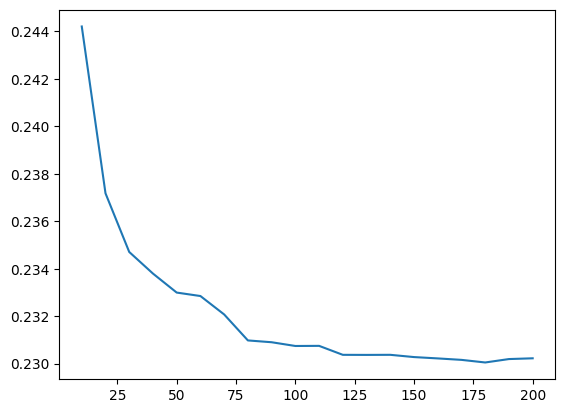

In [ ]:
plt.plot(df_n_scores.n_estimators, df_n_scores.rmse)

After which value of n_estimators does RMSE stop improving? Consider 3 decimal places for retrieving the answer.

    10
    25
    50
    160


### Answer Q.3

---

160

Question 4:

Let's select the best max_depth:

    Try different values of max_depth: [10, 15, 20, 25]
    For each of these values,
        try different values of n_estimators from 10 till 200 (with step 10)
        calculate the mean RMSE
    Fix the random seed: random_state=1

What's the best max_depth, using the mean RMSE?

In [ ]:
# Initialize variables to track best RMSE and the corresponding max_depth
best_rmse = float('inf')  # Initialize with a large value
best_max_depth = None

scores_max = []
# Try different values of max_depth: [10, 15, 20, 25]
for max_depth in [10, 15, 20, 25]:
    # Initialize variable to store mean RMSE for the current max_depth
    mean_rmse = 0

    # Try different values of n_estimators from 10 to 200 with step 10
    for n_estimators in range(10, 201, 10):
        # Create Random Forest Regressor with current max_depth and n_estimators, fix random seed
        model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=1, n_jobs=-1)

        # Train the model on the training data
        model.fit(X_train, y_train)

        # Make predictions on the validation data
        predictions = model.predict(X_val)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_val, predictions))

        # Add current RMSE to the mean_rmse variable
        mean_rmse += rmse
        scores_max.append((max_depth, rmse))
    # Calculate mean RMSE for the current max_depth
    mean_rmse /= 20  # There are 20 different n_estimators values

    # Check if current mean RMSE is better than the best mean RMSE found so far
    if mean_rmse < best_rmse:
        best_rmse = mean_rmse
        best_max_depth = max_depth
        print(best_rmse, best_max_depth)

# Print the best max_depth based on mean RMSE
print("Best max_depth:", best_max_depth)
print("Best Mean RMSE:", round(best_rmse, 3))

0.24346289194907164 10
0.23292183535151634 15
0.23214874470887717 20
Best max_depth: 20
Best Mean RMSE: 0.232


In [ ]:
# 0.24346289194907164 10
# 0.23292183535151634 15
# 0.23214874470887711 20
# Best max_depth: 20
# Best Mean RMSE: 0.232

df_n_depth = pd.DataFrame(scores_max, columns=["max_depth", "rmse"])
df_n_depth

,max_depth,rmse
0,10,0.249470
1,10,0.246560
2,10,0.244567
3,10,0.244642
4,10,0.244407
...,...,...
75,25,0.230265
76,25,0.230207
77,25,0.230173
78,25,0.230317


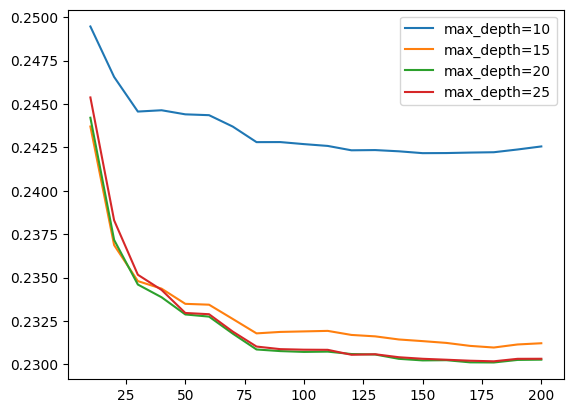

In [ ]:
for d in [10, 15, 20, 25]:
  df_subset = df_n_depth[df_n_depth.max_depth == d]
  plt.plot(range(10, 201, 10), df_subset.rmse, label=f'max_depth={d}')
plt.legend();

What's the best max_depth, using the mean RMSE?

    10
    15
    20
    25


### Answer Q.4

---

20

In [ ]:
# Train the Random Forest Regressor with specified parameters
model = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
model.fit(X_train, y_train)

# Get feature importances from the trained model
feature_importances = model.feature_importances_
# Find the index of the most important feature
most_important_feature_index = np.argmax(feature_importances)

# Print the most important feature index and its importance score
print("Most Important Feature Index:", most_important_feature_index)
print("Most Important Feature:", dv.get_feature_names_out()[most_important_feature_index])
print("Importance Score:", feature_importances[most_important_feature_index])

Most Important Feature Index: 4
Most Important Feature: median_income
Importance Score: 0.3470476095989176


What's the most important feature (among these 4)?

    total_rooms
    median_income
    total_bedrooms
    longitude


### Answer Q.5

---

median_income

### Question 6

Now let's train an XGBoost model! For this question, we'll tune the eta parameter:

    Install XGBoost
    Create DMatrix for train and validation
    Create a watchlist
    Train a model with these parameters for 100 rounds:

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

Now change eta from 0.3 to 0.1.

In [ ]:
!pip install xgboost


In [ ]:
import xgboost as xgb


# Create DMatrix for train and validation data
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_val, label=y_val)

In [ ]:
# Create a watchlist
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]

In [ ]:
# Initial parameters
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'reg:squarederror',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
    'eval_metric': 'rmse'
}

# Train the model for eta = 0.3
num_rounds = 100
model_eta_03 = xgb.train(xgb_params, dtrain, num_rounds, evals=watchlist, early_stopping_rounds=10, verbose_eval=False)

# Update eta parameter to 0.1
xgb_params['eta'] = 0.1

# Train the model for eta = 0.1
model_eta_01 = xgb.train(xgb_params, dtrain, num_rounds, evals=watchlist, early_stopping_rounds=10, verbose_eval=False)

# Get the best RMSE scores for both models
best_rmse_eta_03 = model_eta_03.best_score
best_rmse_eta_01 = model_eta_01.best_score

# Print the best RMSE scores and corresponding eta values
print("Best RMSE (eta=0.3):", round(best_rmse_eta_03,3))
print("Best RMSE (eta=0.1):", round(best_rmse_eta_01,3))


Best RMSE (eta=0.3): 0.223
Best RMSE (eta=0.1): 0.228


Which eta leads to the best RMSE score on the validation dataset?

    0.3
    0.1
    Both give equal value


### Answer Q.6

---
0.3
